<a href="https://colab.research.google.com/github/Victoriambaka/IP-Week-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2022_02_Victoria_Mbaka_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project  Week 4: Processing stations' data to understand electric car usage over time


Main Research question:
* Identify the most popular hour of the day for picking up a shared electric car(Blue car) in the city of Paris over the month of April 2018

Bonus Questions:
* What is the most popular hour for returning cars?
* What station is the most popular?
      - Overall
      -At the most popular picking hour.
* What postal code is the most popular for picking up Blue Cars? Does the most popular station belong to that postal code?
      - Overall
      - At the most popular picking hour.
* Do the results change if you consider Utilib and Utilib 1.4 instead of Blue Cars?

Our dataset can be found in this link: http://bit.ly/autolib_dataset



# 1.0 Importing python Libraries

In [67]:
# Importing pandas library

import pandas as pd

# Importing numpy library
import numpy as np


# 1.1 Reading the Dataset from our CSV file



In [68]:
# Dataset url = http://bit.ly/autolib_dataset
# Creating a dataframe from the csv file and naming it.
# I will name it Tesla.
url = 'http://bit.ly/autolib_dataset'
Tesla = pd.read_csv(url) 
Tesla.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


# 1.2 Previewing our Dataset


In [69]:
# Previewing first ten rows of Tesla
Tesla.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [70]:
# Previewing the last 10 records of Tesla
Tesla.tail(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4990,47 boulevard de l'HÃ´pital,0,0,0,0,0,operational,Paris,NaN,paris-hopital-47,STATION,"48.84019, 2.362478",75013,Paris/HÃ´pital/47,operational,NaN,4,station,ok,nonexistent,2018,4,3,21,13
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,NaN,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,NaN,1,station,ok,nonexistent,2018,4,7,20,43
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,NaN,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,NaN,0,station,ok,nonexistent,2018,4,2,4,43
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


# 1.3 Accessing Information about our Dataset

In [71]:
# Finding out more about the dataset

Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [72]:
Tesla.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


# 1.4 Cleaning the Dataset

## 1.4.0Validity 

In [73]:
# Step 1: Removing irrelevant records
# We drop unwanted columns since they are unnecessary for this project. 
Tesla.drop(['Address','Cars','Charge Slots','Charging Status','Displayed comment','ID', 'Geo point','Rental status','Station type', 'Subscription status','year','month'], axis = 1, inplace = True)
Tesla.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Scheduled at,Slots,Status,day,hour,minute
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,NaN,2,ok,8,11,43
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,NaN,0,ok,6,7,24
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,NaN,1,ok,3,20,14
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,NaN,2,ok,4,4,37
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,NaN,3,ok,8,17,23


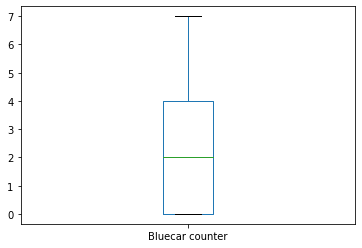

In [74]:
# Step 2: Checking for outliers in the counter columns and determining if they should be removed.
# I will be using boxplots.
# We will need matplotlib library for this operation.

# Checking for outliers in Bluecar counter column
import matplotlib.pyplot as plt
% matplotlib inline
Tesla.boxplot(column = ['Bluecar counter'],grid = False)
# There are no outliers since we dont see any circles


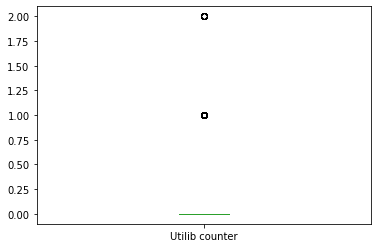

In [75]:
# Checking for outliers in the column Utilib counter

Tesla.boxplot(column = ['Utilib counter'], grid = False)

# We have 2 outliers

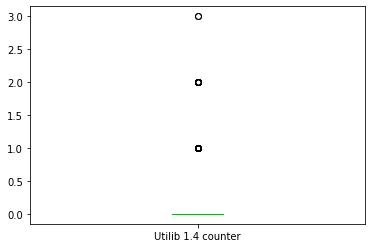

In [76]:
# Checking for outliers in the column Utilib 1.4 Counter
Tesla.boxplot(column = ['Utilib 1.4 counter'],grid = False) 

# We have 3 outliers

In [77]:
# In total we have 5 outliers. But since these outliers are in very crucial columns, it would not be wise to drop them because they are part of the observations.

## 1.4.1 Accuracy

In [78]:
# There is no odd or apparent inaccurate entry. So there is no cause for working out any inaccuracy.

## 1.4.2 Completeness

In [79]:
# checking for missing values
# Using df.isnull() to check for missing values in each column

Tesla.isnull().any()
# There are missing values in the column 'Scheduled at'

Bluecar counter       False
Utilib counter        False
Utilib 1.4 counter    False
City                  False
Kind                  False
Postal code           False
Public name           False
Scheduled at           True
Slots                 False
Status                False
day                   False
hour                  False
minute                False
dtype: bool

In [80]:
# Checking if the Scheduled at column if fully null. If it is fully null, then it should be dropped.
Tesla['Scheduled at'].unique
# It seems all the entries are null, so we can drop this column, since it has no information to offer.

<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4995    NaN
4996    NaN
4997    NaN
4998    NaN
4999    NaN
Name: Scheduled at, Length: 5000, dtype: object>

In [81]:
# Dropping the 'Scheduled at' column.
Tesla.drop(['Scheduled at'], axis = 1, inplace = True)
# Previewing the dataframe
Tesla.head()
# Since we have dropped this column, we now don't have any missing values. 

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Slots,Status,day,hour,minute
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,2,ok,8,11,43
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,0,ok,6,7,24
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,1,ok,3,20,14
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,2,ok,4,4,37
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,3,ok,8,17,23


## 1.4.3 Consistency

In [82]:
# Checking for duplicates

Tesla[Tesla.duplicated()]

# It seems we do not have any duplicates in this case.

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Slots,Status,day,hour,minute


## 1.4.4 Uniformity

In [83]:
# The names of two columns were changed, (Postal code and Public name), to Postal_code and Public_name since in their original form they will run up errors during 
# operations due to the space in between them.

# 1.5. Analysis



In [84]:
# Hint:
# To compute usage, we will need to understand we have to join successive (in time) measures/counters for a given station, as the difference will tell whether 
#a car was picked up, returned, or nothing happened.


In [85]:
# So, we will create a new column where we work out difference in number of bluecars at the station/counter.
Tesla['BC_Diff'] = Tesla['Bluecar counter'].diff()
Tesla['UC_Diff'] = Tesla['Utilib counter'].diff()
Tesla['UC_1.4_Diff'] = Tesla['Utilib 1.4 counter'].diff()
Tesla.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Slots,Status,day,hour,minute,BC_Diff,UC_Diff,UC_1.4_Diff
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,2,ok,8,11,43,NaN,NaN,NaN
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,0,ok,6,7,24,6.0,0.0,0.0
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,1,ok,3,20,14,-3.0,0.0,2.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,2,ok,4,4,37,0.0,1.0,-2.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,3,ok,8,17,23,0.0,-1.0,0.0


In [86]:
# We now have some null values introduced in the difference columns, which we will convert to zero.
# Converting null values to zero.

Tesla['BC_Diff'].fillna(0, inplace = True)
Tesla['UC_Diff'].fillna(0, inplace = True)
Tesla['UC_1.4_Diff'].fillna(0, inplace = True)
Tesla.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Slots,Status,day,hour,minute,BC_Diff,UC_Diff,UC_1.4_Diff
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,2,ok,8,11,43,0.0,0.0,0.0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,0,ok,6,7,24,6.0,0.0,0.0
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,1,ok,3,20,14,-3.0,0.0,2.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,2,ok,4,4,37,0.0,1.0,-2.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,3,ok,8,17,23,0.0,-1.0,0.0


# 1.5.1Answering Research Questions

## 1.5.1.1 Bluecar counter (Main Research Question) 

In [87]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018


#We select Paris city

Pariscar = Tesla[Tesla['City'] =='Paris'] 
# Previewing to check the selection.
Pariscar.head()

# (positive values indicate that a car was returned while negated values indicate that a car was taken)



,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Slots,Status,day,hour,minute,BC_Diff,UC_Diff,UC_1.4_Diff
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,2,ok,8,11,43,0.0,0.0,0.0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,0,ok,6,7,24,6.0,0.0,0.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,2,ok,4,4,37,0.0,1.0,-2.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,3,ok,8,17,23,0.0,-1.0,0.0
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,4,ok,6,7,2,-3.0,0.0,0.0


In [88]:
# Identifying the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
# We pick where there is a negative value, because it indicates that a car was picked.
# We then group by the hour and count how many times each hour appears, then sorting them in descending order to get the highest number of counts.
Pariscar[Pariscar['BC_Diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)

# The most popular hour for picking cars in Paris is 21, which is 9.00pm.

hour
21    80
16    68
7     64
5     62
13    62
23    61
20    61
3     60
8     59
4     58
9     57
18    57
22    55
19    55
17    55
12    54
14    54
10    52
0     52
2     51
6     50
15    49
11    47
1     43
Name: hour, dtype: int64

# Bonus Questions

In [89]:
# What is the most popular hour for returning cars?
# (I worked with most popular hour for returning cars in Paris)
# This time we work with the positive values, since they indicate that a car was returned.

Pariscar[Pariscar['BC_Diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)

# The most popular hour for returning cars in Paris is 3.00am.

hour
3     49
12    48
10    48
6     46
8     44
21    43
11    42
19    42
15    42
18    40
9     40
0     39
1     38
2     38
22    38
16    37
5     37
23    35
13    33
7     33
17    33
4     31
20    27
14    25
Name: hour, dtype: int64

In [90]:
# What station is the most popular? * Overall?
# Still working with the Paris dataset

Pariscar[(Pariscar['Kind'] == 'STATION')].groupby('Public name')['Public name'].count().sort_values(ascending= False) 

# Paris/Porte de Montrouge/8 is the most popular station with 13 entries for overall.

Public name
Paris/Porte de Montrouge/8    13
Paris/Philippe Auguste/126    11
Paris/Courcelles/69           11
Paris/Voltaire/182            11
Paris/Mathis/35               11
                              ..
Paris/Custine/45               1
Paris/Gambetta/65              1
Paris/FÃ©dÃ©ration/10          1
Paris/Sorbier/40               1
Paris/Lecourbe/336             1
Name: Public name, Length: 541, dtype: int64

In [104]:
# What station is the most popular? At the most popular picking hour?
# Three cells above, we found the most popular picking hour to be 21(9.00pm)
# So we filter out where kind is 'station', hour is 21 and group them by the station public name.
# (For Bluecar)

Pariscar[(Pariscar['Kind'] == 'STATION') & (Pariscar['BC_Diff']<0) & (Pariscar['hour'] == 21)].groupby('Public_name')['Public_name'].count().sort_values(ascending= False)

# Most popular station is Paris/Tronchet/19 with 4 entries, at picking hour.
   

Public_name
Paris/Tronchet/19                 4
Paris/Voltaire/182                3
Paris/HÃ´pital/47                 2
Paris/Flandre/61                  2
Paris/Saint-MandÃ©/94             2
                                 ..
Paris/Ivry/58                     1
Paris/Jean Moulin/34              1
Paris/Jean-FranÃ§ois LÃ©pine/1    1
Paris/Jouffroy d'Abbans/14        1
Paris/Ãmile Reynaud/4            1
Name: Public_name, Length: 61, dtype: int64

In [111]:
# What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
# Overall?

Pariscar[(Pariscar['BC_Diff'] < 0)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)
# 75015 is the most popular for picking cars in Paris with 116 entries.

Postal_code
75015    116
75008    102
75012     96
75017     96
75016     81
75013     79
75019     76
75011     69
75014     69
75010     65
75018     64
75020     62
75006     57
75007     57
75009     55
75005     53
75004     47
75001     42
75003     40
75002     34
75112      5
75116      1
Name: Postal_code, dtype: int64

In [94]:
# Changing column name Postal code to Postal_code and Public name to Public_name
# why? Because the space in between Postal and code makes it to be identified as two separate words, also for public and name.
Pariscar.columns = ['Bluecar counter','Utilib counter',	'Utilib 1.4 counter',	'City',	'Kind',	'Postal_code', 'Public_name',	'Slots',	'Status',	'day', 'hour',	'minute',	'BC_Diff', 'UC_Diff', 'UC_1.4_Diff']
# Checking if the change is effected.
Pariscar.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal_code,Public_name,Slots,Status,day,hour,minute,BC_Diff,UC_Diff,UC_1.4_Diff
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,2,ok,8,11,43,0.0,0.0,0.0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,0,ok,6,7,24,6.0,0.0,0.0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,2,ok,4,4,37,0.0,1.0,-2.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,3,ok,8,17,23,0.0,-1.0,0.0
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,4,ok,6,7,2,-3.0,0.0,0.0


In [112]:
# Getting the address of the most popular station, and if it is 75015.
Popcode = ['Paris/Porte de Montrouge/8']
Pariscar[Pariscar.Public_name.isin(Popcode)].head()
# The postal code is not 75015, but 75014. 
# So the most popular station does not belong to postal code 75015.

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal_code,Public_name,Slots,Status,day,hour,minute,BC_Diff,UC_Diff,UC_1.4_Diff
122,3,0,1,Paris,STATION,75014,Paris/Porte de Montrouge/8,2,ok,8,19,57,-1.0,-1.0,1.0
194,1,1,0,Paris,STATION,75014,Paris/Porte de Montrouge/8,4,ok,8,16,5,1.0,1.0,0.0
360,0,0,1,Paris,STATION,75014,Paris/Porte de Montrouge/8,5,ok,2,22,12,-2.0,0.0,1.0
1010,5,1,0,Paris,STATION,75014,Paris/Porte de Montrouge/8,0,ok,6,2,46,3.0,1.0,0.0
1282,4,0,1,Paris,STATION,75014,Paris/Porte de Montrouge/8,0,ok,7,10,37,1.0,0.0,1.0


In [109]:
# What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
# At the most popular picking hour?

Pariscar[(Pariscar['hour'] == 21)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)
# The most popular postal code for picking up blue cars at the most popular hour is 75014 with 16 entries.
# The most popular station belongs to this address as demonstrated in the cell above.

Postal_code
75014    16
75019    15
75016    13
75012    12
75015    11
75008    11
75011    10
75013    10
75017     7
75007     7
75020     6
75009     5
75018     4
75003     4
75010     3
75006     3
75005     3
75004     3
75001     3
75002     1
Name: Postal_code, dtype: int64

## Utilib counter.

In [98]:
# Identify the most popular hour of the day for picking up a Utilib car in the city of Paris over the month of April 2018

Pariscar[Pariscar['UC_Diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)

# The most popular hour for picking up Utilib cars in Paris is 19 which is 7.00 pm.

hour
19    12
23    10
14    10
22    10
10     9
6      9
9      8
8      8
5      8
11     7
3      7
17     6
7      6
20     6
2      6
15     6
16     6
0      5
13     5
4      5
1      4
12     4
18     3
21     3
Name: hour, dtype: int64

In [99]:
# What is the most popular hour for returning cars?

Pariscar[Pariscar['UC_Diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)
# Most popular time for returning Utilib cars is 6.00 am.

hour
6     12
17     9
8      9
11     9
14     8
21     7
18     7
7      7
10     7
15     6
0      5
13     5
12     5
5      5
3      5
2      5
9      4
16     4
1      3
4      3
19     3
20     3
22     3
23     1
Name: hour, dtype: int64

In [100]:
# What station is the most popular? * Overall?

Pariscar[(Pariscar['Kind'] == 'STATION')].groupby('Public_name')['Public_name'].count().sort_values(ascending= False)
# Paris/Porte de Montrogue/8 is the most populat station.

Public_name
Paris/Porte de Montrouge/8    13
Paris/Philippe Auguste/126    11
Paris/Courcelles/69           11
Paris/Voltaire/182            11
Paris/Mathis/35               11
                              ..
Paris/Custine/45               1
Paris/Gambetta/65              1
Paris/FÃ©dÃ©ration/10          1
Paris/Sorbier/40               1
Paris/Lecourbe/336             1
Name: Public_name, Length: 541, dtype: int64

In [102]:
# What station is the most popular? At the most popular picking hour?
# Three cells above, we found the most popular picking hour to be 19(7.00pm)
# So we filter out where kind is 'station', hour is 19 and group them by the station public name.

Pariscar[(Pariscar['Kind'] == 'STATION') & (Pariscar['UC_Diff']<0) & (Pariscar['hour'] == 19)].groupby('Public_name')['Public_name'].count().sort_values(ascending= False)

# There is no popular station since all stations appear once. 

Public_name
Paris/Belleville/265          1
Paris/Caulaincourt/17         1
Paris/Charonne/52             1
Paris/Convention/171          1
Paris/Gambetta/19             1
Paris/Guy Patin/10            1
Paris/LinnÃ©/18               1
Paris/Pierre Chausson/1       1
Paris/Pommard/7               1
Paris/Porte de Montrouge/8    1
Paris/PyrÃ©nÃ©es/89           1
Paris/SÃ©gur/55               1
Name: Public_name, dtype: int64

In [108]:
# What postal code is the most popular for picking up Utilib cars? Does the most popular station belong to that postal code?
# Overall?

Pariscar[(Pariscar['UC_Diff'] < 0)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)

# The most popular postal code for Utilib cars is 75015 with 22 entries.

# There was no popular station as demonstrated in the cell above.

Postal_code
75015    22
75017    15
75016    15
75020    12
75019    10
75014     9
75010     9
75004     8
75007     8
75009     8
75012     8
75008     7
75013     7
75011     6
75002     5
75018     5
75005     3
75006     2
75003     2
75001     2
Name: Postal_code, dtype: int64

In [107]:
# What postal code is the most popular for picking up Utilib cars? Does the most popular station belong to that postal code?
# At the most popular picking hour?

Pariscar[(Pariscar['UC_Diff'] < 0) & (Pariscar['hour'] == 19)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)

# The most popular postal code for picking up blue cars at the most popular hour is 75020 with 4 entries.
# There was no popular station

Postal_code
75020    4
75010    2
75005    1
75007    1
75012    1
75014    1
75015    1
75018    1
Name: Postal_code, dtype: int64

## Utilib 1.4 counter

In [113]:
# Identify the most popular hour of the day for picking up a Utilib 1.4 car in the city of Paris over the month of April 2018

Pariscar[Pariscar['UC_1.4_Diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)

# The most popular time for picking up the cars was 3.00 am.

hour
3     20
4     17
0     16
8     16
19    16
10    16
12    15
23    12
17    12
21    12
11    12
20    12
2     12
14    12
16    12
22    11
18    11
7     11
5     10
9     10
6      8
13     8
1      7
15     7
Name: hour, dtype: int64

In [114]:
# What is the most popular hour for returning cars?

Pariscar[Pariscar['UC_1.4_Diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)

# The most popular hour for returning cars is 9.00 am.

hour
9     17
5     15
17    15
22    14
21    14
10    13
15    12
3     12
6     12
12    11
19    11
1     11
16    11
20    10
18    10
23     9
13     9
11     9
7      9
14     8
8      8
4      8
0      7
2      6
Name: hour, dtype: int64

In [115]:
# What station is the most popular? * Overall?

Pariscar[(Pariscar['Kind'] == 'STATION')].groupby('Public_name')['Public_name'].count().sort_values(ascending= False)

# Most popular station overall is Paris/Porte de Montrouge/8 with 13 entries

Public_name
Paris/Porte de Montrouge/8    13
Paris/Philippe Auguste/126    11
Paris/Courcelles/69           11
Paris/Voltaire/182            11
Paris/Mathis/35               11
                              ..
Paris/Custine/45               1
Paris/Gambetta/65              1
Paris/FÃ©dÃ©ration/10          1
Paris/Sorbier/40               1
Paris/Lecourbe/336             1
Name: Public_name, Length: 541, dtype: int64

In [117]:
# What station is the most popular? At the most popular picking hour?
# Three cells above, we found the most popular picking hour (3.00am)
# So we filter out where kind is 'station', hour is 3 and group them by the station public name.

Pariscar[(Pariscar['Kind'] == 'STATION') & (Pariscar['UC_1.4_Diff']<0) & (Pariscar['hour'] == 3)].groupby('Public_name')['Public_name'].count().sort_values(ascending= False)

# There still is no popular station.

Public_name
Paris/Arnold Netter/10            1
Paris/Brunel/42                   1
Paris/Suffren/161                 1
Paris/Simon Bolivar/96            1
Paris/Saint-Vincent-de-Paul/26    1
Paris/Saint-MandÃ©/94             1
Paris/PÃ©trarque/2                1
Paris/PyrÃ©nÃ©es/236              1
Paris/Plantes/56                  1
Paris/Mortier/15                  1
Paris/Madame/18                   1
Paris/Legendre/126                1
Paris/Jouffroy d'Abbans/108       1
Paris/Henri Martin/70             1
Paris/Francois 1er/7              1
Paris/Commerce/5                  1
Paris/Caillaux/24                 1
Paris/ThÃ©ophile Gauthier/14      1
Name: Public_name, dtype: int64

In [118]:
# What postal code is the most popular for picking up Utilib 1.4 cars? Does the most popular station belong to that postal code?
# Overall?

Pariscar[(Pariscar['UC_1.4_Diff'] < 0)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)

# The most popular postal code for Utilib 1.4 cars is 75015 with 35 entries.

# There isn't a popular station.

Postal_code
75015    35
75016    24
75012    23
75017    22
75011    20
75020    20
75019    18
75013    17
75008    13
75007    13
75006    13
75010    12
75009    10
75014    10
75018    10
75002     9
75003     8
75004     7
75005     5
75001     4
75116     2
Name: Postal_code, dtype: int64

In [119]:
# What postal code is the most popular for picking up Utilib 1.4 cars? Does the most popular station belong to that postal code?
# At the most popular picking hour?

Pariscar[(Pariscar['UC_1.4_Diff'] < 0) & (Pariscar['hour'] == 19)].groupby('Postal_code')['Postal_code'].count().sort_values(ascending= False)

# The most popular postal code for picking up blue cars at the most popular hour is 75020 with 3 entries.
# There was no popular station

Postal_code
75020    3
75011    2
75012    2
75013    2
75019    2
75003    1
75006    1
75010    1
75016    1
75017    1
Name: Postal_code, dtype: int64

No handles with labels found to put in legend.


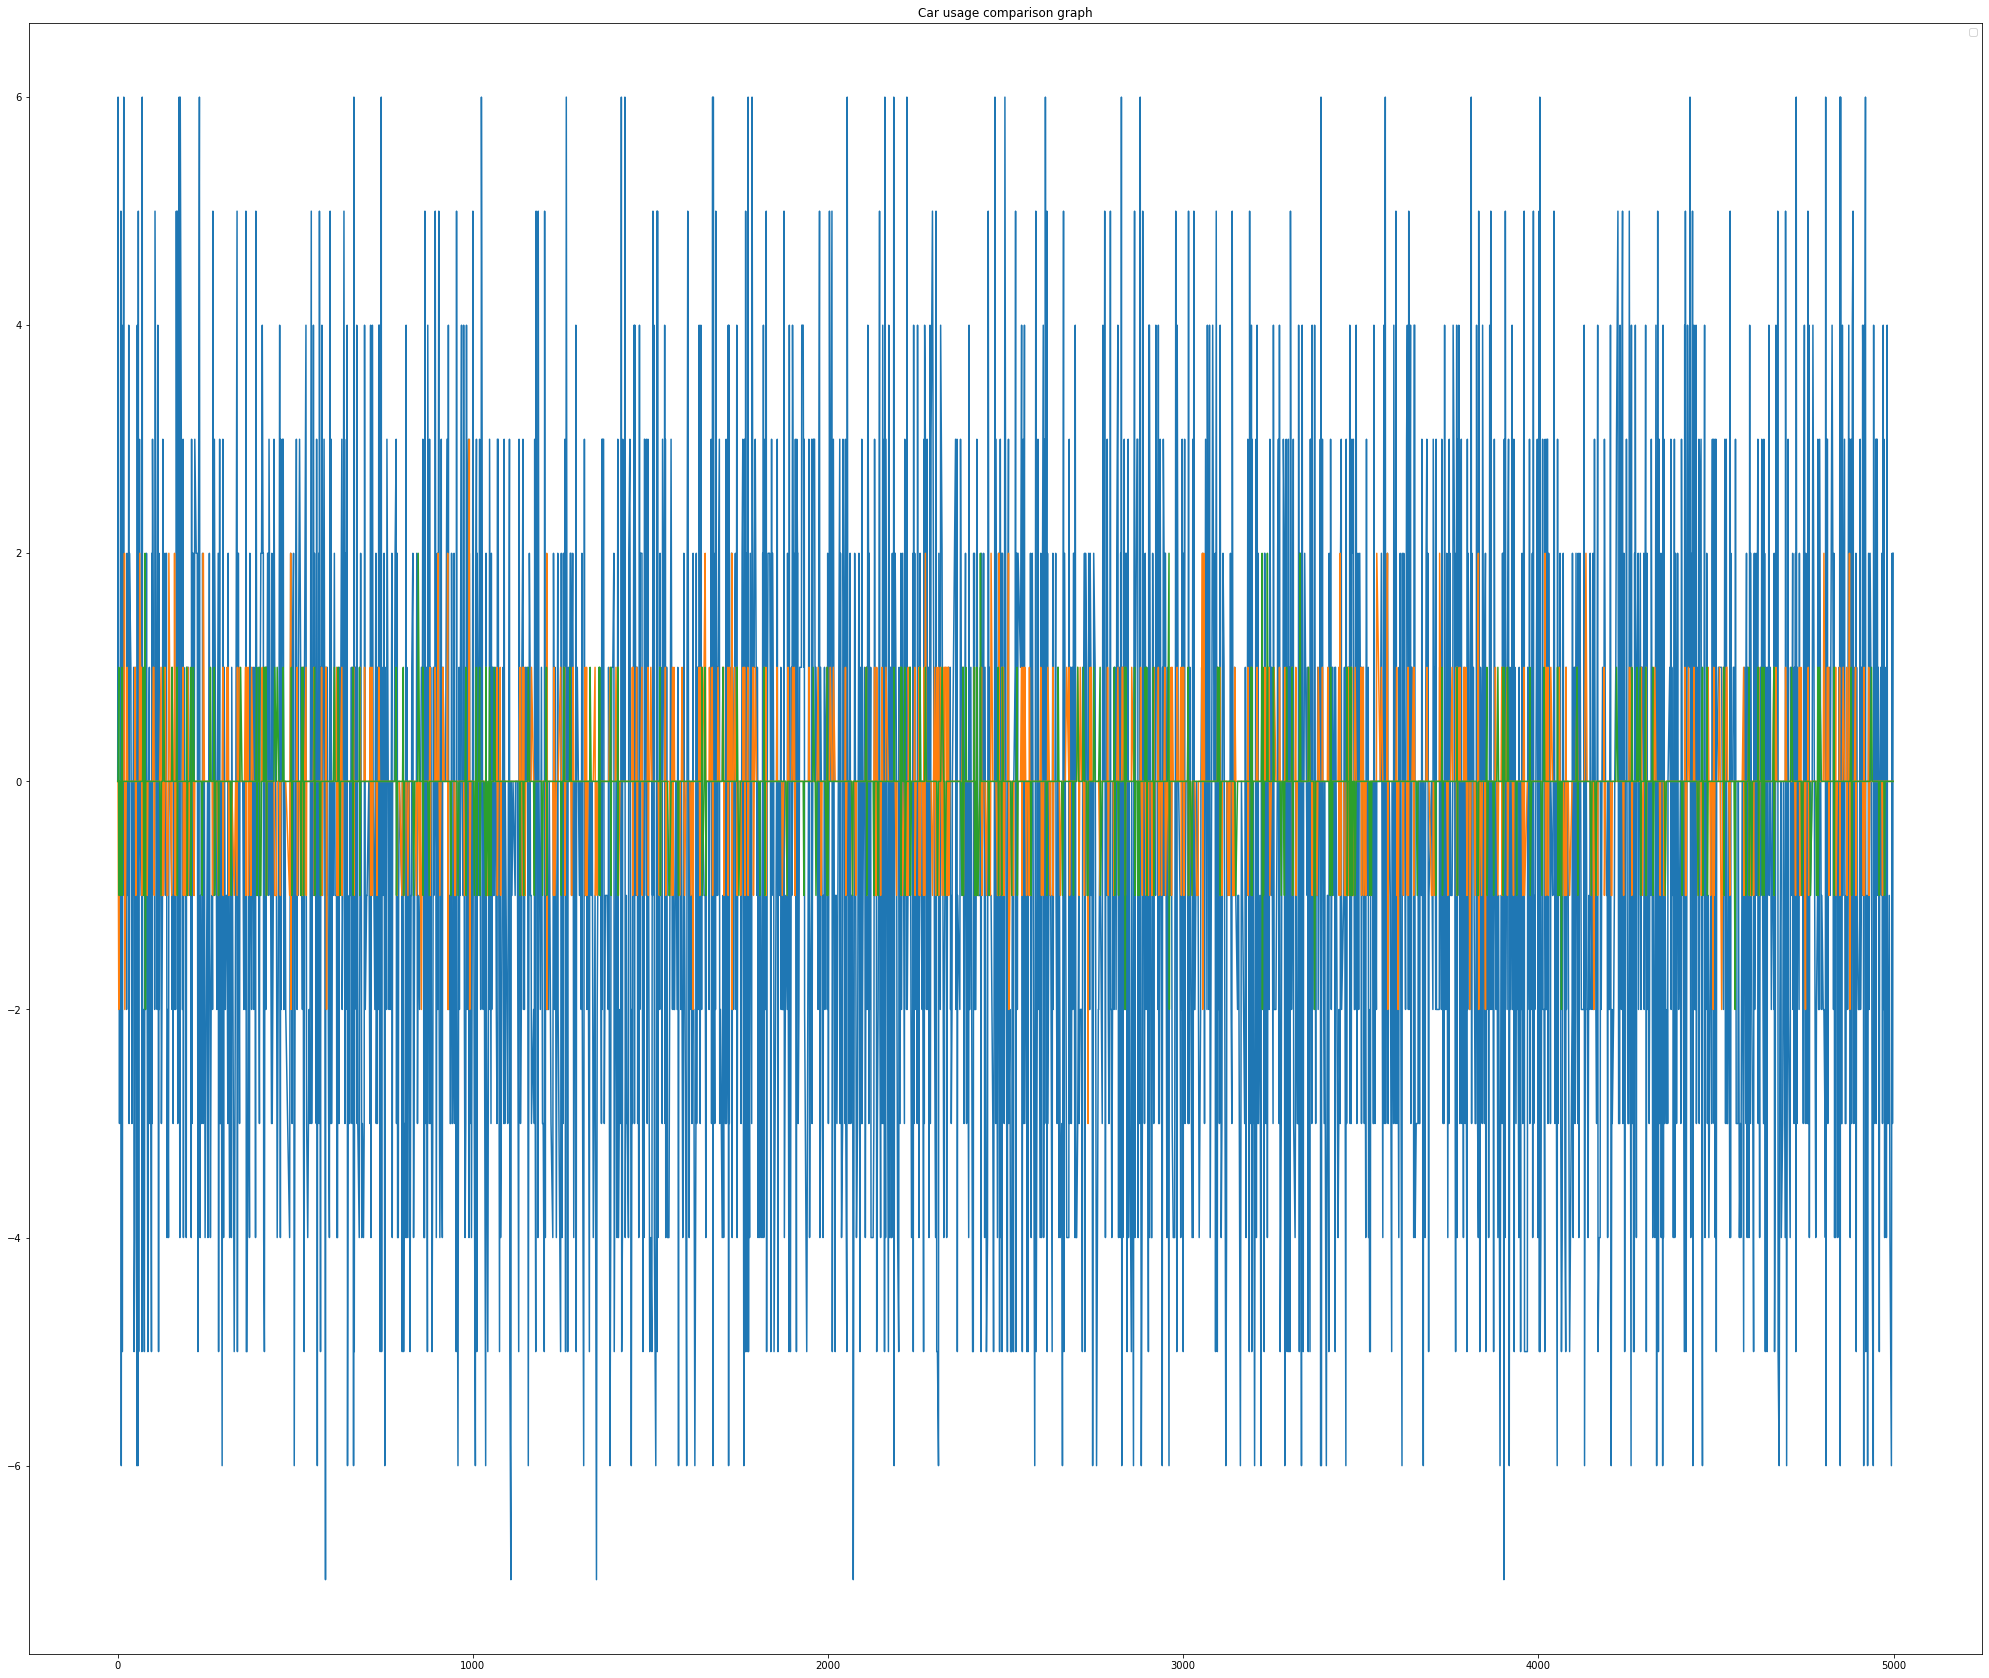

In [139]:
# Attempting to plot a graph to visibly see the differences of all the car counters at once.

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 35,30
plt.plot(Pariscar['BC_Diff'])
plt.plot(Pariscar['UC_1.4_Diff'])
plt.plot(Pariscar['UC_Diff']);
plt.legend(loc =1)
plt.title('Car usage comparison graph');

In [ ]:
# It looks like a piece of art. But from the coloration, you can tell that there is a significant difference between the usage of bluecars and the usage of Utilib and Utilib 1.4 cars. 
# Bluecar(blue)
# Green (Utilib)
# Orange (Utilib 1.4)